# 實作Sequential 跟 Functional API兩種方法
# BUT 模型一樣

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%env KERAS_BACKEND = tensorflow
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, LeakyReLU, Flatten
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import adam

env: KERAS_BACKEND=tensorflow


Using TensorFlow backend.


In [3]:
(x_train0, y_train0), (x_test0, y_test0) = mnist.load_data()

In [4]:
x_train = x_train0
x_test = x_test0

x_train -= x_train0.min()
x_train = x_train / x_train.max()

x_test -= x_test0.min()
x_test = x_test / x_test.max()

In [5]:
y_train = np_utils.to_categorical(y_train0, 10)
y_test = np_utils.to_categorical(y_test0, 10)

In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [7]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [8]:
# x_train = x_train.reshape(x_train.shape[0], 28 * 28)
# x_test = x_test.reshape(x_test.shape[0], 28 * 28)

# model construction

In [9]:
model_cnn = Sequential([
    Conv2D(32, (3, 3), padding = 'same', input_shape = (28, 28, 1)),
    MaxPooling2D(),
    LeakyReLU(alpha = 0.3),
    Dropout(0.25),
    
    Conv2D(32, (3, 3), padding = 'same'),
    MaxPooling2D(),
    LeakyReLU(alpha = 0.3),
    Dropout(0.25), 
    
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.25),
    Dense(32, activation = 'relu'), 
    Dropout(0.25), 
    Dense(10, activation = 'softmax')
    
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 7, 7, 32)          0         
__________

In [11]:
model_cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

In [12]:
model_cnn_fit = model_cnn.fit(x_train, y_train, batch_size = 128, epochs = 30)
score = model_cnn.evaluate(x_test, y_test)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
60000/60000 [==============================] - 45s 752us/step - loss: 0.4238 - acc: 0.8651
Epoch 2/30
60000/60000 [==============================] - 45s 748us/step - loss: 0.1318 - acc: 0.9628
Epoch 3/30
60000/60000 [==============================] - 44s 735us/step - loss: 0.0979 - acc: 0.97231s - loss: 0.0982 - 
Epoch 4/30
60000/60000 [==============================] - 44s 740us/step - loss: 0.0813 - acc: 0.9767
Epoch 5/30
60000/60000 [==============================] - 46s 773us/step - loss: 0.0727 - acc: 0.9792
Epoch 6/30
60000/60000 [==============================] - 47s 780us/step - loss: 0.0626 - acc: 0.98201s - loss: 0.
Epoch 7/30
60000/60000 [==============================] - 45s 756us/step - loss: 0.0555 - acc: 0.9842
Epoch 8/30
60000/60000 [==============================] - 45s 746us/step - loss: 0.0530 - acc: 0.9851
Epoch 9/30
60000/60000 [==============================] - 43s 711us/step - loss: 0.0506 - acc: 0.9859
E

Testing loss:  0.029775072792726995
Testing acc:  0.9925


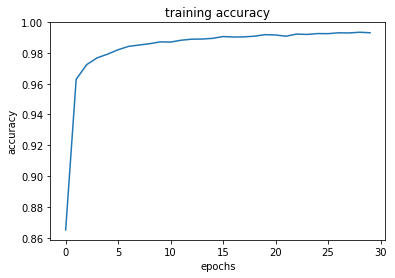

In [13]:
plt.plot(model_cnn_fit.history['acc'])
plt.title('training accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
print('Testing loss: ', score[0])
print('Testing acc: ', score[1])

# 用Functional API

In [18]:
from keras.layers import Input, concatenate, Softmax
from keras.models import Model

In [19]:
x = Input(shape = (28, 28, 1))
conv1 = Conv2D(32, (3, 3), padding = 'same')
max1 = MaxPooling2D()
re1 = LeakyReLU(alpha = 0.3)
dp1 = Dropout(0.25)
conv2 = Conv2D(32, (3, 3), padding = 'same')
max2 = MaxPooling2D()
re2 = LeakyReLU(alpha = 0.3)
dp2 = Dropout(0.25) 
flat = Flatten()
fc1 = Dense(128, activation = 'relu')
dp3 = Dropout(0.25)
fc2 = Dense(32, activation = 'relu') 
dp4 = Dropout(0.25)
fc3 = Dense(10, activation = 'softmax')

In [20]:
out = fc3(dp4(fc2(dp3(fc1(flat(dp2(re2(max2(conv2(dp1(re1(max1(conv1(x))))))))))))))

In [21]:
model_api = Model(x, out)
model_api.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 32)          0         
__________

In [22]:
model_api.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

In [23]:
model_api_fit = model_api.fit(x_train, y_train, batch_size = 128, epochs = 30)
score = model_api.evaluate(x_test, y_test)

Epoch 1/30
60000/60000 [==============================] - 48s 802us/step - loss: 0.4463 - acc: 0.8606
Epoch 2/30
60000/60000 [==============================] - 49s 815us/step - loss: 0.1428 - acc: 0.9606
Epoch 3/30
60000/60000 [==============================] - 50s 828us/step - loss: 0.1056 - acc: 0.9704
Epoch 4/30
60000/60000 [==============================] - 48s 803us/step - loss: 0.0849 - acc: 0.9761
Epoch 5/30
60000/60000 [==============================] - 46s 771us/step - loss: 0.0758 - acc: 0.97862s - 
Epoch 6/30
60000/60000 [==============================] - 46s 764us/step - loss: 0.0664 - acc: 0.9817
Epoch 7/30
60000/60000 [==============================] - 47s 790us/step - loss: 0.0622 - acc: 0.9823
Epoch 8/30
60000/60000 [==============================] - 46s 766us/step - loss: 0.0577 - acc: 0.9836
Epoch 9/30
60000/60000 [==============================] - 48s 794us/step - loss: 0.0521 - acc: 0.9855
Epoch 10/30
60000/60000 [==============================] - 46s 774us/step - l

Testing loss:  0.026385290406289983
Testing acc:  0.9933


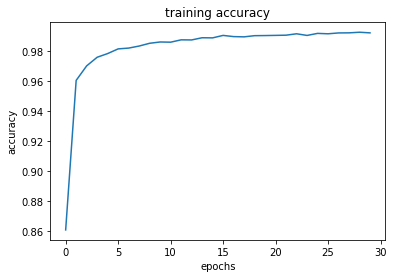

In [24]:
plt.plot(model_api_fit.history['acc'])
plt.title('training accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
print('Testing loss: ', score[0])
print('Testing acc: ', score[1])

# 結果相差不遠 合理